In [1]:
import Pkg; Pkg.activate(@__DIR__); Pkg.instantiate();

  Activating new project at `~/Documents/eth_courses/notebooks/control/embedded_control_class`


In [2]:
using LinearAlgebra
using ControlSystems
using GLMakie

In [3]:
rad_to_hz(ω) = ω / (2 * π)
hz_to_rad(f) = 2 * π * f

hz_to_rad (generic function with 1 method)

In [4]:
function get_torque_Nmm_from_duty_cycle(duty_cycle)
    torque = 3.1625 * (duty_cycle - 0.5)

    # convert from Nm to Nmm
    torque_Nmm = torque/1000
    
    return torque
end

k_Nmm_deg_to_k_Nm_rad(k_Nmm_deg) = k_Nmm_deg  * (180 /π)  * (1/1000)

k_Nmm_deg_to_k_Nm_rad (generic function with 1 method)

In [5]:
let

k_Nmm_deg = 50 
max_duty_cycle = 0.76
    
k_Nm_rad = k_Nmm_deg_to_k_Nm_rad(k_Nmm_deg)
max_torque_Nmm = get_torque_Nmm_from_duty_cycle(max_duty_cycle)

# wheel angle for max torque
max_angle_rad = max_torque_Nmm / k_Nm_rad
# max_angle_deg = rad2deg(max_angle_rad)
    
end

0.28701939549046745

In [6]:
get_Cmax(;T,Tc) = (T/Tc) - 1
get_Cth(;T,Tc) = (T/Tc) - 1
get_DC(;Cth,Cmax) =  Cth / (Cmax + 1)

let

fc = 10 * 1e6 # MHz

    
Tc = 1 / fc

end

1.0e-7

In [13]:
# Create system
Ts      = 0.0001
k = 2.86 #Nm / rad
J_w = 4.5 * 1e-4

A       = [0 1; -k/J_w 0]
B       = [0; k/J_w]
C       = [1 0]

sys_c     = ss(A,B,C,0)

# convert to discrete time
sys_d = c2d(sys_c, Ts)

StateSpace{Discrete{Float64}, Float64}
A = 
  0.9999682223905264  9.999894074410683e-5
 -0.635548823395879   0.9999682223905264
B = 
 3.1777609473607586e-5
 0.6355488233958789
C = 
 1.0  0.0
D = 
 0.0

Sample Time: 0.0001 (seconds)
Discrete-time state-space model

## Simulation

In [14]:
u(x,t)  = 0
t       = 0:Ts:10             # Time vector
x0      = [π/4,0]               # Initial condition

y, t, x, uout = lsim(sys_d,u,t,x0=x0)

ControlSystemsBase.SimResult{Matrix{Float64}, StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}, Matrix{Float64}, Matrix{Float64}, StateSpace{Discrete{Float64}, Float64}}([0.7853981633974483 0.7853732053213306 … 0.5719167584748802 0.576189920103566], 0.0:0.0001:10.0, [0.7853981633974483 0.7853732053213306 … 0.5719167584748802 0.576189920103566; 0.0 -0.4991588786445326 … 42.91381232796563 42.548967606667354], [0.0 0.0 … 0.0 0.0], StateSpace{Discrete{Float64}, Float64}
A = 
  0.9999682223905264  9.999894074410683e-5
 -0.635548823395879   0.9999682223905264
B = 
 3.1777609473607586e-5
 0.6355488233958789
C = 
 1.0  0.0
D = 
 0.0

Sample Time: 0.0001 (seconds)
Discrete-time state-space model)

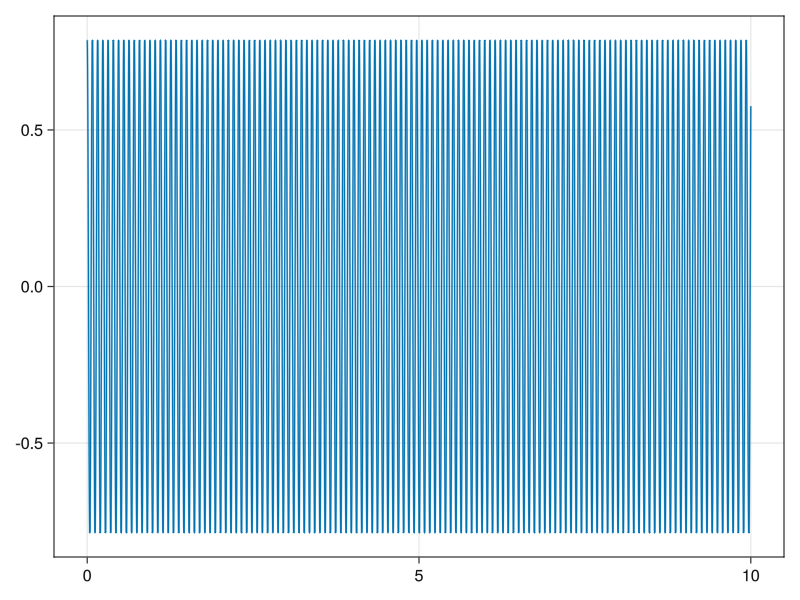

In [15]:
lines(t, vec(y))

In [64]:
# get the poles 

poles(sys_d)

2-element Vector{ComplexF64}:
 0.9999994463040511 + 0.0010523267511698604im
 0.9999994463040511 - 0.0010523267511698604im

In [16]:
isstable(sys_d)

false